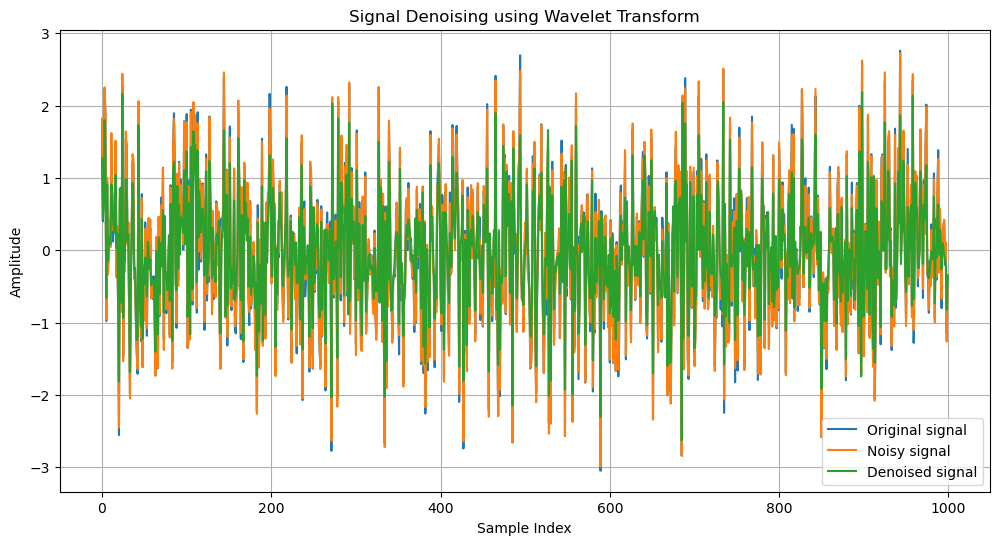

SNR: 9.480309757076988


In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt


def denoise_signal(signal, wavelet='db4', level=6, noise_std=0.1):
    try:
        # Decompose signal into wavelet coefficients
        coeffs = pywt.wavedec(signal, wavelet, level=level)


        # Threshold the coefficients using universal threshold
        threshold = noise_std * np.sqrt(2 * np.log(len(signal)))
        denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]


        # Reconstruct the signal from the denoised coefficients
        denoised_signal = pywt.waverec(denoised_coeffs, wavelet)


        # Ensure the reconstructed signal has the same length as the original signal
        denoised_signal = denoised_signal[:len(signal)]


        # Calculate SNR
        noise = signal - denoised_signal
        snr = 20 * np.log10(np.linalg.norm(signal) / np.linalg.norm(noise))


        return denoised_signal, snr
    except Exception as e:
        print(f"Error during denoising: {e}")
        return None, None


def plot_signals(original_signal, noisy_signal, denoised_signal):
    plt.figure(figsize=(12, 6))
    plt.plot(original_signal, label='Original signal')
    plt.plot(noisy_signal, label='Noisy signal')
    plt.plot(denoised_signal, label='Denoised signal')
    plt.legend()
    plt.title('Signal Denoising using Wavelet Transform')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


# Generate a noisy signal
np.random.seed(0)
original_signal = np.random.randn(1000)
noise = 0.1 * np.random.randn(1000)
noisy_signal = original_signal + noise


# Denoise the signal
denoised_signal, snr = denoise_signal(noisy_signal)




plot_signals(original_signal, noisy_signal, denoised_signal)




if snr is not None:
    print('SNR:', snr)
else:
    print('Denoising failed.')

In [4]:
import numpy as np
import pywt


def add_noise(signal, noise_std):
    noise = np.random.normal(0, noise_std, size=len(signal))
    noisy_signal = signal + noise
    return noisy_signal


def denoise_signal(signal):
    # Decompose signal into wavelet coefficients
    coeffs = pywt.wavedec(signal, 'db4', level=6)


    # Threshold the coefficients using universal threshold
    threshold = np.sqrt(2*np.log(len(signal)))
    denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]


    # Reconstruct the signal from the denoised coefficients
    denoised_signal = pywt.waverec(denoised_coeffs, 'db4')


    # Calculate the signal-to-noise ratio (SNR)
    noise = signal - denoised_signal
    snr = 20*np.log10(np.linalg.norm(signal)/np.linalg.norm(noise))


    return denoised_signal, snr


# Generate a signal
signal = np.sin(2*np.pi*5*np.linspace(0, 1, num=1000))


# Add Gaussian noise to the signal
noise_std = 0.1
noisy_signal = add_noise(signal, noise_std)


# Denoise the signal and print the SNR
denoised_signal, snr = denoise_signal(noisy_signal)
print('SNR:', snr)

SNR: 3.4588075583090405
